<h1 style="color: red;">I- Exploratory Data Analysis</h1>

<h2 style="color: green;">1- Importing Dataset & Modules & Data Exploration</h2>


In [9]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
    
# Load the dataset
df = pd.read_csv('bank.csv')
# Display the first 5 rows to verify the data
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [10]:
# Print last 5 rows of the dataframe
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


### Simple Description of Columns:

#### **Bank Client Data**:
- **age**: The client's age in years (e.g., 30, 45).  
- **job**: The type of job the client has (e.g., "admin", "student", "retired").  
- **marital**: The client's marital status (e.g., "married", "single", "divorced").  
- **education**: The client's education level (e.g., "primary", "secondary", "tertiary").  
- **default**: Whether the client has a credit in default (e.g., "yes", "no").  
- **balance**: The average yearly balance in the client's account, in euros.  
- **housing**: Whether the client has a housing loan (e.g., "yes", "no").  
- **loan**: Whether the client has a personal loan (e.g., "yes", "no").  

#### **Last Contact Information**:
- **contact**: How the client was contacted (e.g., "telephone", "cellular").  
- **day**: The day of the month when the client was last contacted (e.g., 15, 30).  
- **month**: The month when the client was last contacted (e.g., "jan", "feb").  
- **duration**: The duration of the last contact with the client, in seconds.  

#### **Other Attributes**:
- **campaign**: The number of times the client was contacted during this campaign.  
- **pdays**: The number of days since the client was last contacted in a previous campaign. If the client wasn't contacted before, this is -1.  
- **previous**: The number of times the client was contacted before this campaign.  
- **poutcome**: The outcome of the previous marketing campaign (e.g., "success", "failure").  

#### **Output Variable (Target)**:
- **subscribed***: Whether the client subscribed to a term deposit (e.g., "yes", "no"). This is what you want to predict.

In [12]:
# Generate statistical summary for numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [13]:
# Display dataset information: data types, non-null counts, and memory usage
# This helps identify missing values and understand the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


Correlation Matrix:
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.139874  0.042411  0.076732 -0.002876  0.009121  0.063805
balance   0.139874  1.000000  0.037078  0.096633  0.025103 -0.033014  0.030292
day       0.042411  0.037078  1.000000  0.058597 -0.019719  0.054188  0.063716
duration  0.076732  0.096633  0.058597  1.000000 -0.005188 -0.095650 -0.015965
campaign -0.002876  0.025103 -0.019719 -0.005188  1.000000  0.030929  0.140995
pdays     0.009121 -0.033014  0.054188 -0.095650  0.030929  1.000000  0.218636
previous  0.063805  0.030292  0.063716 -0.015965  0.140995  0.218636  1.000000


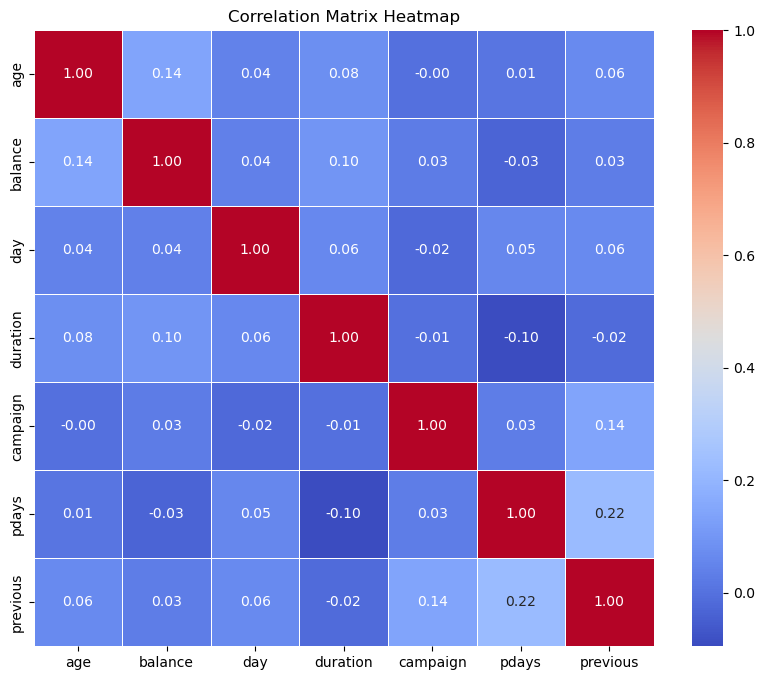

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### **Interpretation of Correlation Matrix and Heatmap**

The correlation matrix and heatmap provide insights into the relationships between numerical variables in the dataset. Here’s a breakdown of the key findings:

---

#### **1. Correlation Values**:
- Correlation coefficients range from **-1 to 1**:
  - **1**: Perfect positive correlation.
  - **-1**: Perfect negative correlation.
  - **0**: No correlation.

---

#### **2. Key Observations**:
- **Age**:
  - Shows weak positive correlations with most variables.
  - Highest correlation with **balance** (0.14), indicating that older clients tend to have slightly higher balances.

- **Balance**:
  - Weak positive correlation with **duration** (0.10), suggesting that clients with higher balances may have longer contact durations.
  - Weak negative correlation with **pdays** (-0.03), indicating a slight tendency for clients with higher balances to have been contacted less frequently in the past.

- **Day**:
  - No strong correlations with other variables.
  - Slight positive correlation with **duration** (0.06), implying that contacts later in the month may last slightly longer.

- **Duration**:
  - Weak positive correlation with **balance** (0.10) and **day** (0.06).
  - Weak negative correlation with **pdays** (-0.10), suggesting that clients contacted after longer intervals may have shorter contact durations.

- **Campaign**:
  - Weak positive correlation with **previous** (0.14), indicating that clients contacted more times in the current campaign were also contacted more times in previous campaigns.
  - No significant correlations with other variables.

- **Pdays**:
  - Moderate positive correlation with **previous** (0.22), indicating that clients contacted more times in the past were also contacted after longer intervals.
  - Weak negative correlation with **duration** (-0.10).

- **Previous**:
  - Moderate positive correlation with **pdays** (0.22), suggesting that clients contacted more times in the past were also contacted after longer intervals.
  - Weak positive correlation with **campaign** (0.14).

---

#### **3. Heatmap Insights**:
- The heatmap visually confirms the weak to moderate correlations observed in the matrix.
- Darker shades (closer to 1 or -1) indicate stronger correlations, while lighter shades (closer to 0) indicate weaker or no correlations.
- No strong correlations (≥ 0.5 or ≤ -0.5) are observed, indicating that the variables are mostly independent of each other.

---

#### **4. Conclusion**:
- The dataset shows **weak to moderate correlations** between numerical variables.
- **Balance** and **duration** have the most notable relationships with other variables.
- These insights can guide further analysis, such as feature selection for predictive modeling or identifying key factors influencing client behavior.

In [16]:
# Check for missing values in the dataset
# This helps identify columns with incomplete data that may need imputation or further investigation
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64


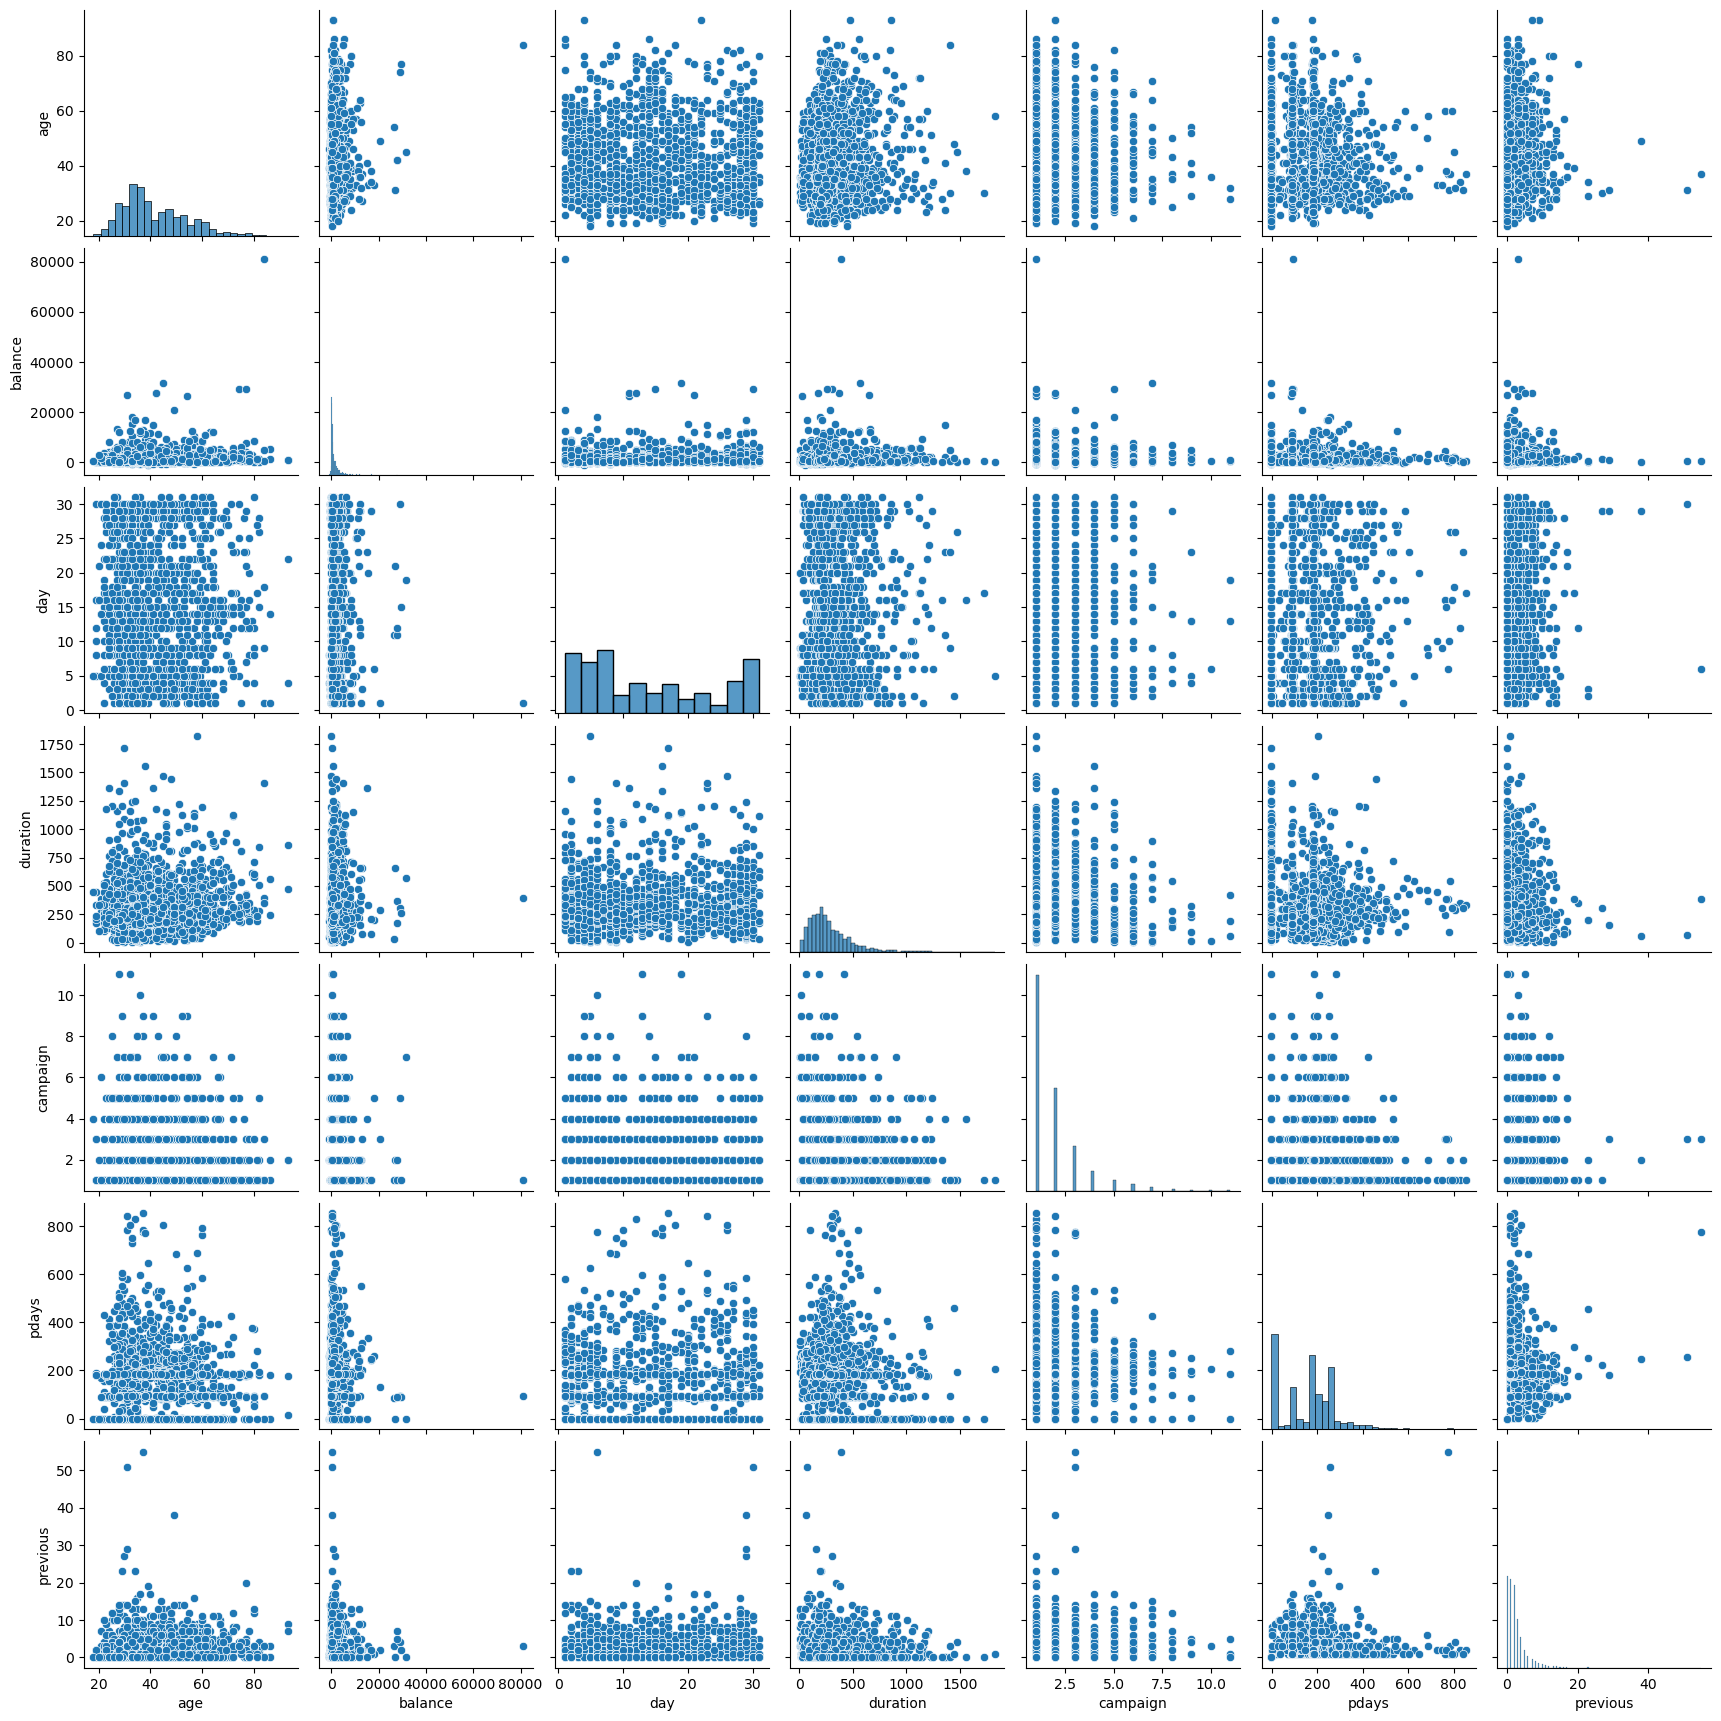

In [17]:
# Create a pair plot to visualize relationships between numerical variables
# This helps identify patterns, correlations, and potential outliers
sns.pairplot(df)

# Display the plot
plt.show()

### **Interpretation of Pair Plot**

The pair plot provides a comprehensive view of the relationships between numerical variables in the dataset. Here’s a breakdown of the key insights:

---

#### **1. Diagonal (Histograms/KDE Plots)**:
- **Distribution of Variables**:
  - The diagonal plots show the distribution of each numerical variable.
  - For example:
    - **Age**: The distribution appears to be slightly right-skewed, indicating that most clients are in the younger to middle-aged range.
    - **Balance**: The distribution shows a peak around lower values, suggesting that many clients have relatively low balances.
    - **Duration**: The distribution is right-skewed, indicating that most calls are shorter in duration.

---

#### **2. Off-Diagonal (Scatter Plots)**:
- **Relationships Between Variables**:
  - The scatter plots show the relationships between pairs of numerical variables.
  - Key observations:
    - **Age vs. Balance**:
      - There is no strong linear relationship, but there may be some clustering of older clients with higher balances.
    - **Age vs. Duration**:
      - No clear trend, but some younger clients tend to have longer call durations.
    - **Balance vs. Duration**:
      - Weak positive correlation, suggesting that clients with higher balances may have slightly longer call durations.
    - **Campaign vs. Previous**:
      - Weak positive correlation, indicating that clients contacted more times in the current campaign were also contacted more times in previous campaigns.

---

#### **3. Patterns and Outliers**:
- **Clusters**:
  - Some scatter plots show clusters of data points, which may indicate subgroups within the dataset (e.g., clients with similar characteristics).
- **Outliers**:
  - A few data points appear far from the main cluster, which could be outliers (e.g., clients with unusually high balances or call durations).

---

#### **4. Target Variable (if `hue` is used)**:
- If the pair plot includes a `hue` parameter (e.g., colored by the target variable `y`), you can observe:
  - **Separability**:
    - Whether the target classes ("yes" and "no") are separable based on the numerical variables.
  - **Trends**:
    - For example, clients who subscribed to a term deposit (`y = "yes"`) may have higher balances or longer call durations.

---

#### **5. Summary of Insights**:
- **Weak Correlations**:
  - Most numerical variables show weak or no linear correlations, indicating that they are relatively independent of each other.
- **Potential Subgroups**:
  - Clusters in scatter plots suggest the presence of subgroups (e.g., younger clients with lower balances vs. older clients with higher balances).
- **Outliers**:
  - A few outliers may need further investigation to determine if they are data errors or valid extreme cases.

---

### **Next Steps**:
- **Feature Engineering**:
  - Consider creating new features (e.g., age groups, balance categories) to capture non-linear relationships.
- **Outlier Handling**:
  - Investigate and decide whether to remove or transform outliers.
- **Modeling**:
  - Use insights from the pair plot to select relevant features for predictive modeling.

<h3 style="color: #FF5733;"> Examination of Categorical Attributes</h2>

In [20]:
# Identify categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')


In [21]:
# Print unique values for each categorical column
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")
    print(f"Number of unique values in {column}: {df[column].nunique()}")
    print()

Unique values in job: ['technician' 'retired' 'blue-collar' 'self-employed' 'services'
 'management' 'admin.' 'unemployed' 'student' 'entrepreneur' 'housemaid'
 nan]
Number of unique values in job: 11

Unique values in marital: ['single' 'divorced' 'married']
Number of unique values in marital: 3

Unique values in education: ['tertiary' 'secondary' nan 'primary']
Number of unique values in education: 3

Unique values in default: ['no' 'yes']
Number of unique values in default: 2

Unique values in housing: ['yes' 'no']
Number of unique values in housing: 2

Unique values in loan: ['no' 'yes']
Number of unique values in loan: 2

Unique values in contact: ['cellular' 'telephone' nan]
Number of unique values in contact: 2

Unique values in month: ['apr' 'dec' 'feb' 'jan' 'mar' 'may' 'nov' 'oct' 'aug' 'jul' 'jun' 'sep']
Number of unique values in month: 12

Unique values in poutcome: ['failure' 'other' 'success' nan]
Number of unique values in poutcome: 3

Unique values in subscribed: ['no'

In [24]:
# Create frequency tables for each categorical variable
for column in categorical_columns:
    print(f"Frequency Table for {column}:")
    print(df[column].value_counts())
    print()

Frequency Table for job:
job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: count, dtype: int64

Frequency Table for marital:
marital
married     1111
single       674
divorced     215
Name: count, dtype: int64

Frequency Table for education:
education
secondary    995
tertiary     684
primary      217
Name: count, dtype: int64

Frequency Table for default:
default
no     1985
yes      15
Name: count, dtype: int64

Frequency Table for housing:
housing
no     1037
yes     963
Name: count, dtype: int64

Frequency Table for loan:
loan
no     1750
yes     250
Name: count, dtype: int64

Frequency Table for contact:
contact
cellular     1663
telephone     146
Name: count, dtype: int64

Frequency Table for month:
month
feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104


In [25]:
# Example: Cross-tabulation between 'job' and 'marital'
print("Cross-tabulation of Job and Marital Status:")
print(pd.crosstab(df['job'], df['marital']))

Cross-tabulation of Job and Marital Status:
marital        divorced  married  single
job                                     
admin.               32      128      87
blue-collar          22      193      83
entrepreneur          4       33       8
housemaid             5       20      10
management           49      247     165
retired              38      120       4
self-employed         5       37      22
services             19       95      51
student               1        1      94
technician           31      200     117
unemployed            9       31      29


<h2 style="color: green;">2-distribution analyssis for numerical atributes</h2>


This step involves analyzing the distribution of numerical variables in the dataset. Key tasks include:
- **Histograms**: Visualize the distribution of each numerical variable.
- **Boxplots**: Identify outliers and understand the spread of data.
- **Violin Plots**: Combine boxplots and density estimation.
- **KDE Plots**: Show the probability density of numerical data.
- **Scatter Plots**: Explore relationships between pairs of numerical variables.

In [28]:
# Identify numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


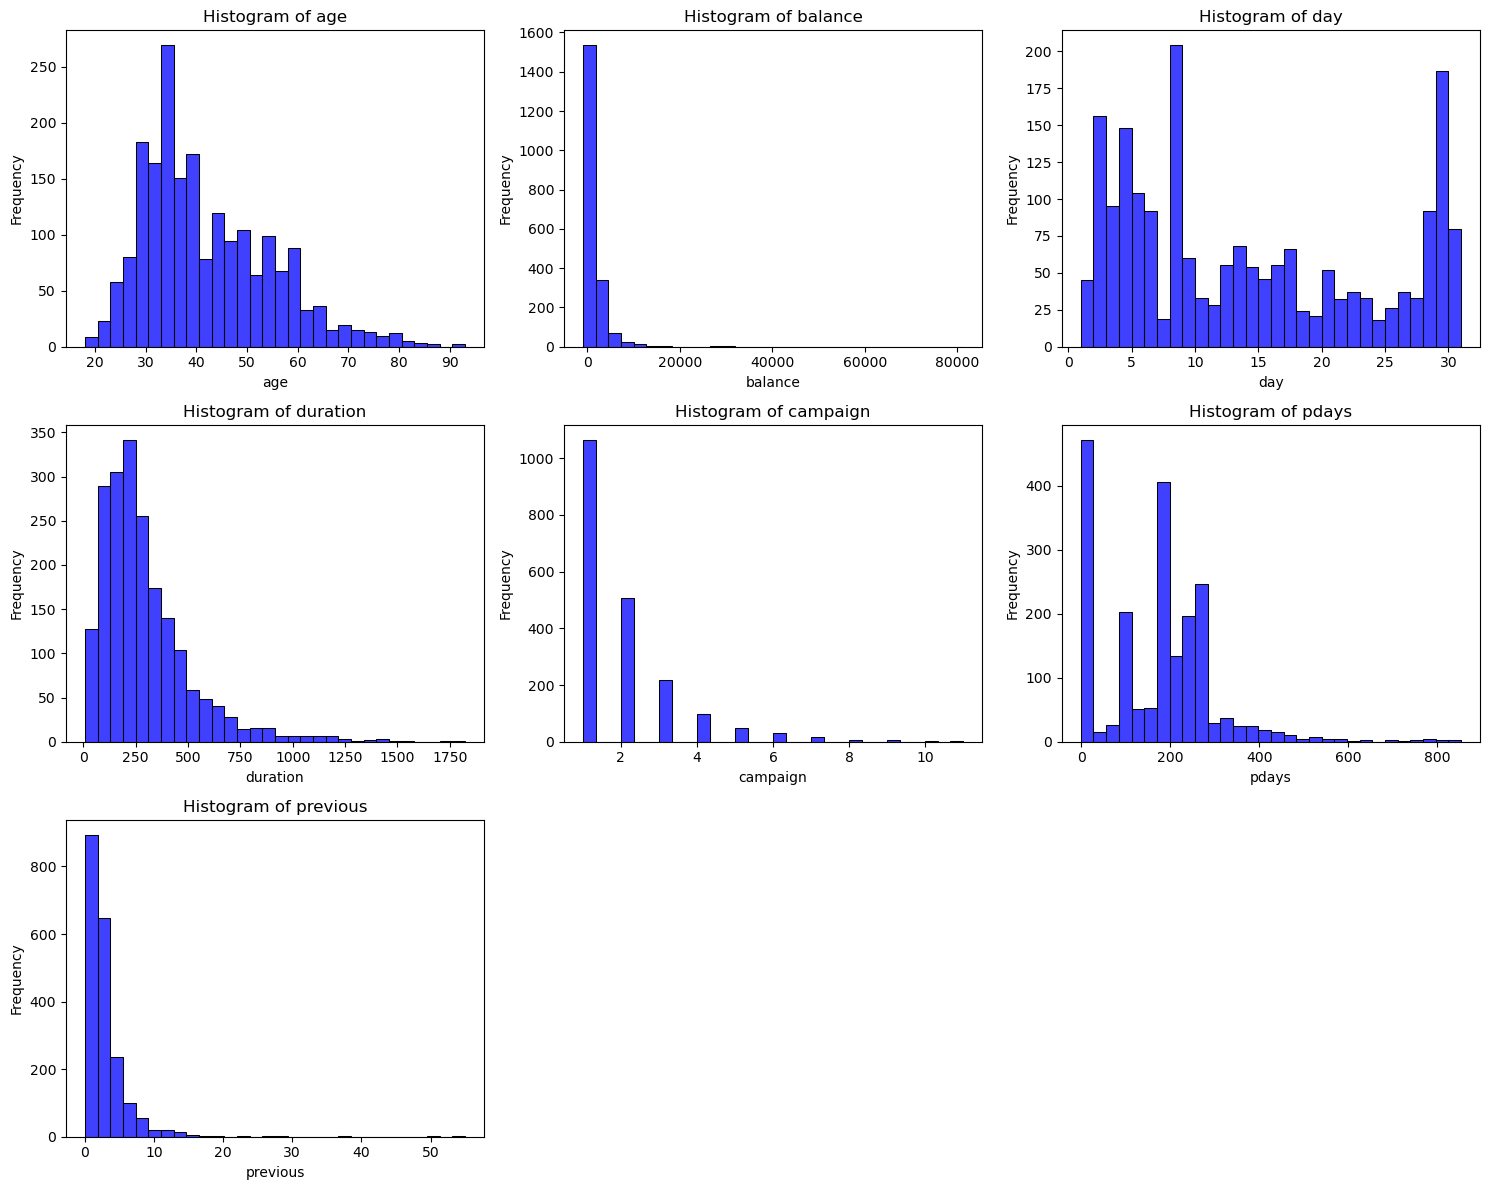

In [78]:
# Plot histograms for numerical columns
import math

# Define the number of rows and columns for the grid
num_plots = len(numerical_columns)
num_cols = 3  # Adjust based on your preference
num_rows = math.ceil(num_plots / num_cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows/columns

# Plot histograms
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=False, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## 📊 Why Use KDE Plots for Numerical Columns?

Kernel Density Estimation (**KDE**) plots help visualize the **probability density distribution** of a numerical variable. Unlike histograms, KDE plots provide a **smooth and continuous estimation** of data distribution.

### 🔹 Key Benefits:
- **Smooth Representation:** Shows trends without the need for binning like histograms.
- **Better Comparisons:** Helps in comparing multiple distributions in a single plot.
- **Detecting Skewness & Outliers:** Highlights asymmetry and unusual values in the dataset.

### 📌 When to Use KDE Plots?
Use KDE plots when you need a **continuous and intuitive** representation of data distribution without the limitations of histograms.

🚀 KDE plots are especially useful for **exploratory data analysis (EDA)** to understand how numerical features are distributed.


C:\Users\dell\AppData\Local\Temp\ipykernel_12312\2372759280.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='purple', ax=axes[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_12312\2372759280.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='purple', ax=axes[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_12312\2372759280.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, color='purple', ax=axes[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_12312\2372759280.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; set

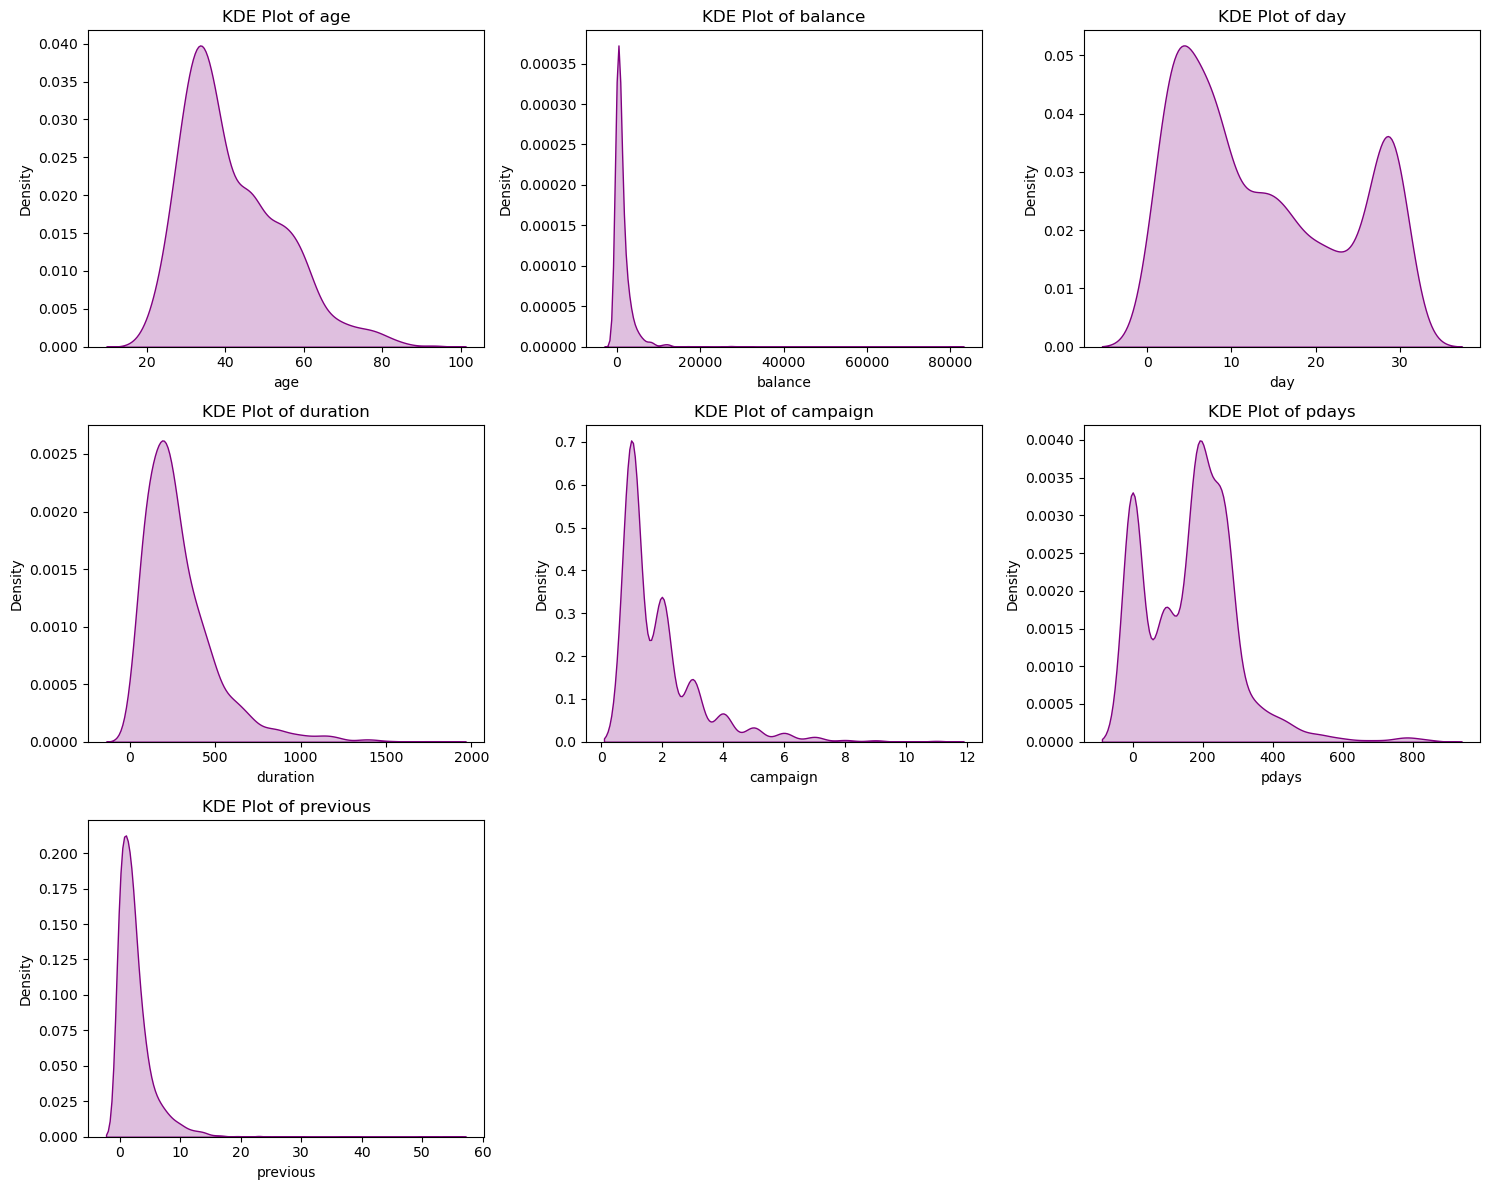

In [84]:
# Plot KDE plots for numerical columns
# Define the number of rows and columns for the grid
num_plots = len(numerical_columns)
num_cols = 3  # Adjust based on preference
num_rows = math.ceil(num_plots / num_cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows/columns

# Plot KDE plots
for i, column in enumerate(numerical_columns):
    sns.kdeplot(df[column], shade=True, color='purple', ax=axes[i])
    axes[i].set_title(f"KDE Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Density")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

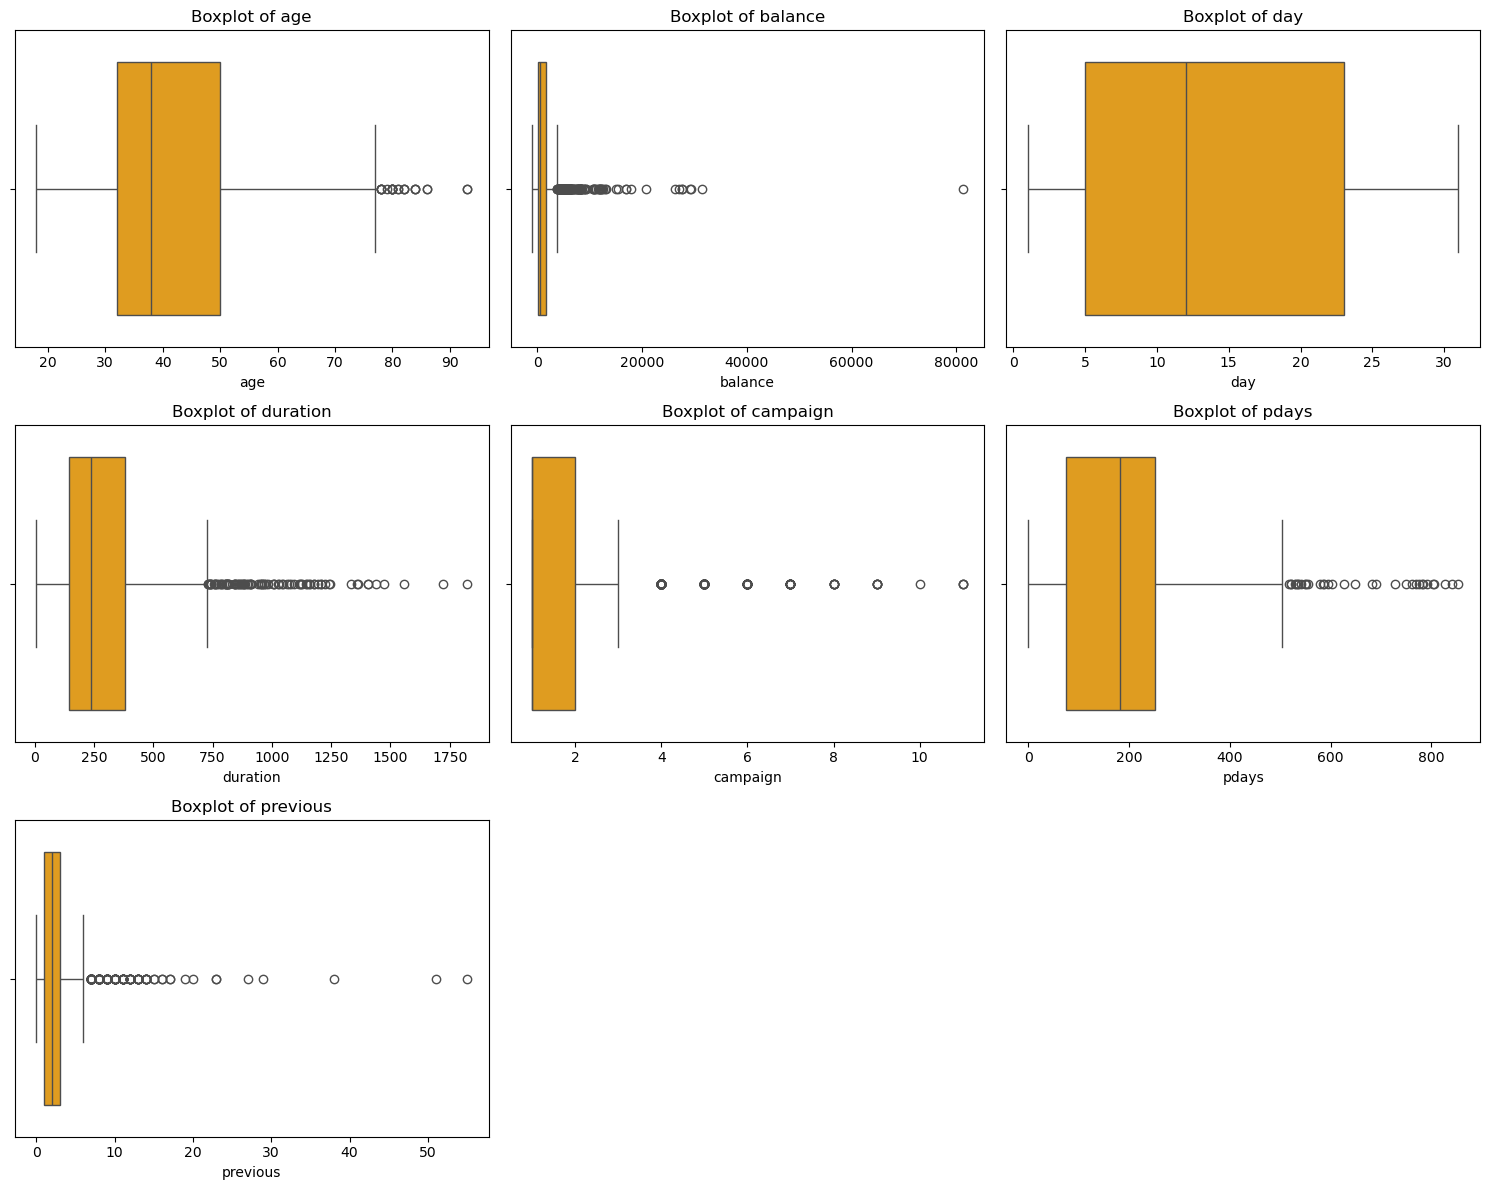

In [80]:
# Plot boxplots for numerical columns
# Define the number of rows and columns for the grid
num_plots = len(numerical_columns)
num_cols = 3  # Adjust based on preference
num_rows = math.ceil(num_plots / num_cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows/columns

# Plot boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], color='orange', ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")
    axes[i].set_xlabel(column)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

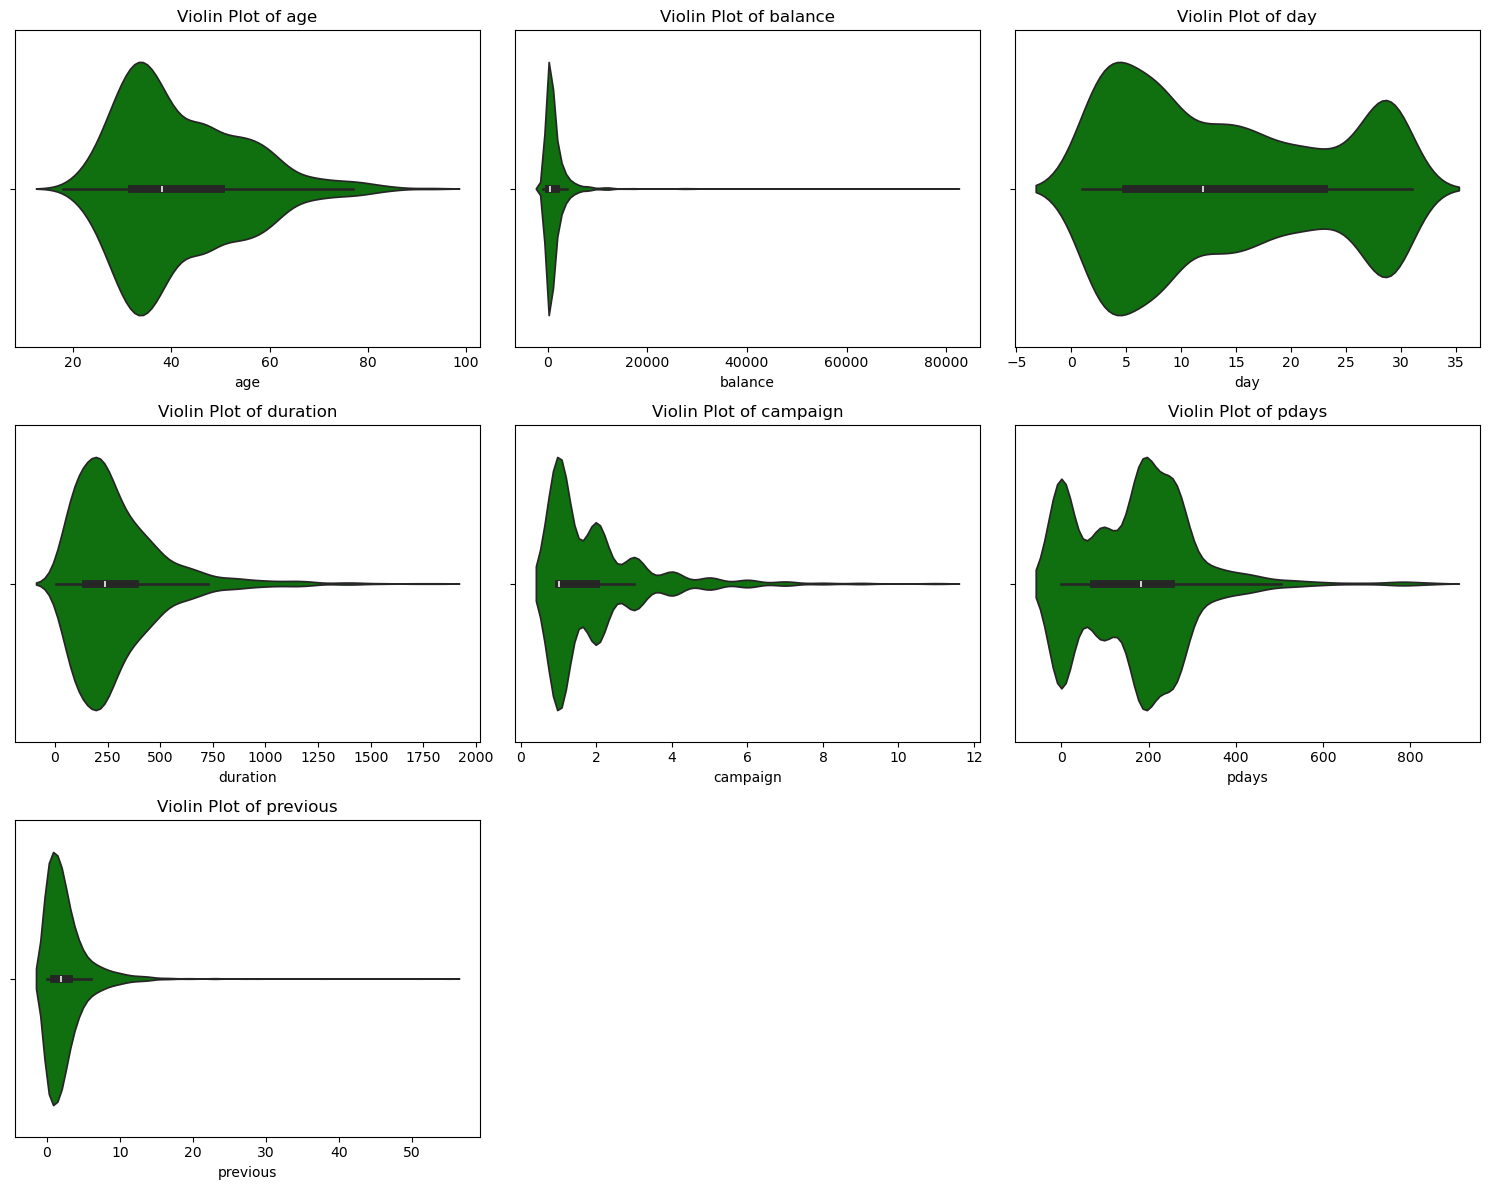

In [82]:
# Plot violin plots for numerical columns
# Define the number of rows and columns for the grid
num_plots = len(numerical_columns)
num_cols = 3  # Adjust based on preference
num_rows = math.ceil(num_plots / num_cols)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows/columns

# Plot violin plots
for i, column in enumerate(numerical_columns):
    sns.violinplot(x=df[column], color='green', ax=axes[i])
    axes[i].set_title(f"Violin Plot of {column}")
    axes[i].set_xlabel(column)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

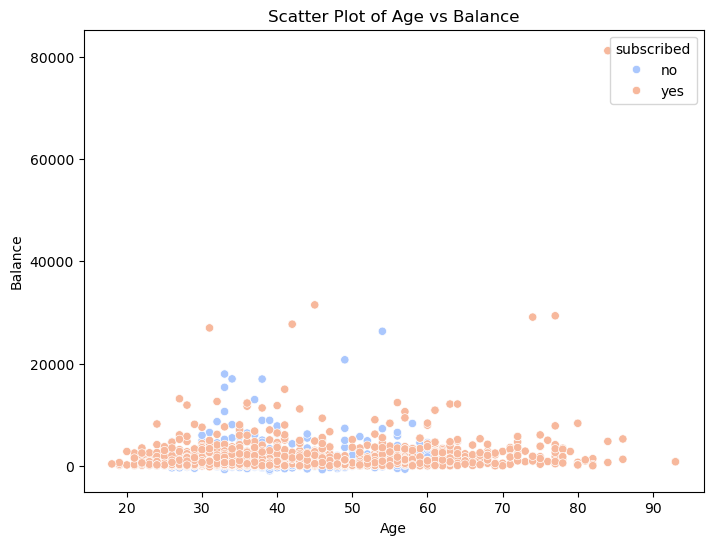

In [33]:
# Plot scatter plots for pairs of numerical columns
# Example: Scatter plot of 'age' vs 'balance'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='balance', hue='subscribed', palette='coolwarm')
plt.title("Scatter Plot of Age vs Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

<h2 style="color: green;">3-Distribution Analysis for Categorical Attributes</h2>

This step involves analyzing the distribution of categorical variables in the dataset. Key tasks include:
- **Pivot Table**: Summarize data and analyze relationships between categorical and numerical variables.
- **Frequency Table**: Show the count of each category in a categorical variable.
- **Crosstab**: Analyze relationships between two categorical variables.
- **Bar Plots**: Visualize the distribution of categorical variables.

C:\Users\dell\AppData\Local\Temp\ipykernel_12312\258676752.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='coolwarm', ax=axes[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_12312\258676752.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='coolwarm', ax=axes[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_12312\258676752.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='coolwarm', ax=axes[i])
C:\Users\dell\AppData\Local\Temp\ipykernel_12312\258

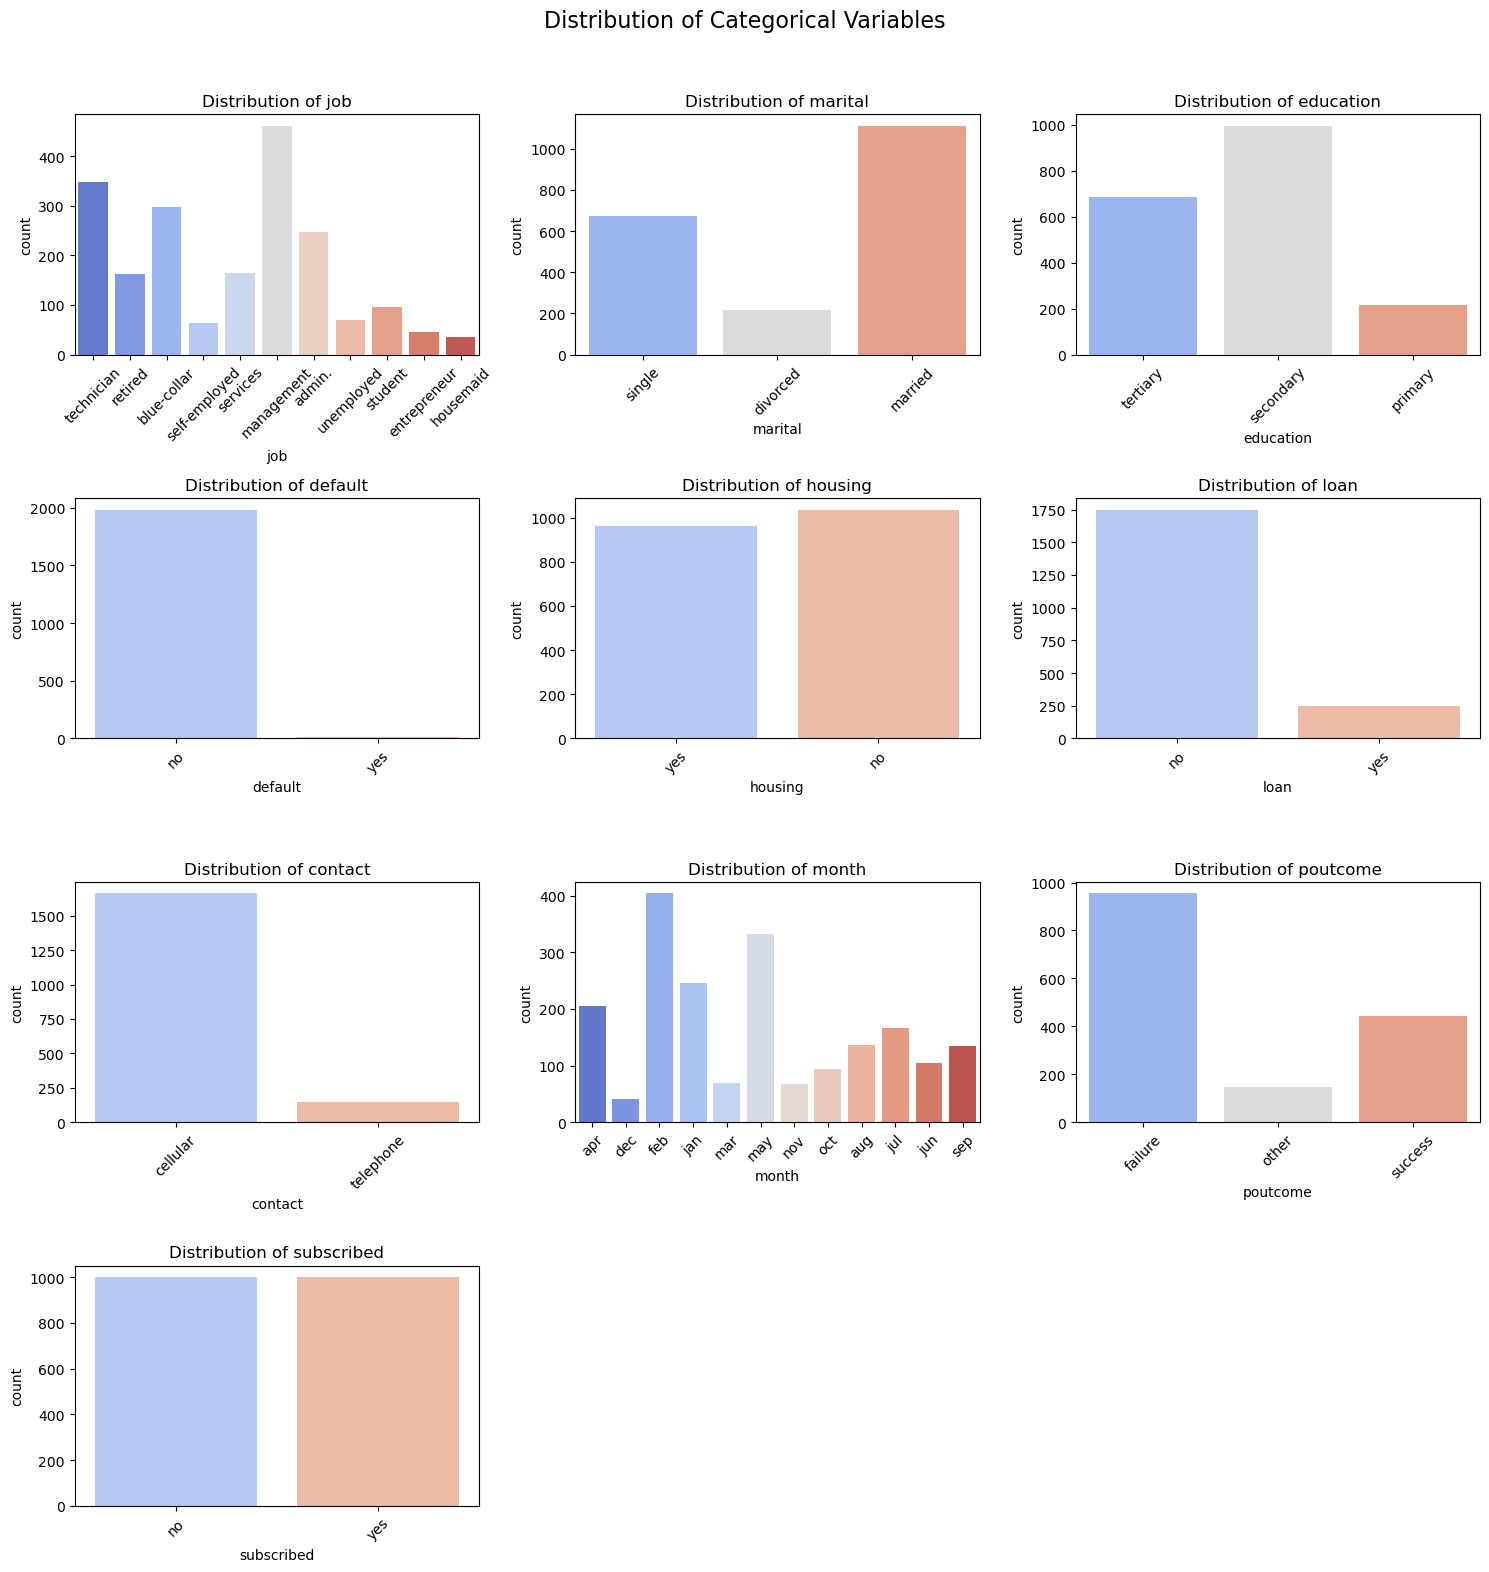

In [87]:
# Plot the distribution of each categorical variable
import math
# Define number of rows and columns for grid layout
num_cols = 3  # Number of columns in the grid
num_rows = math.ceil(len(categorical_columns) / num_cols)  # Adjust rows dynamically

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
fig.suptitle("Distribution of Categorical Variables", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

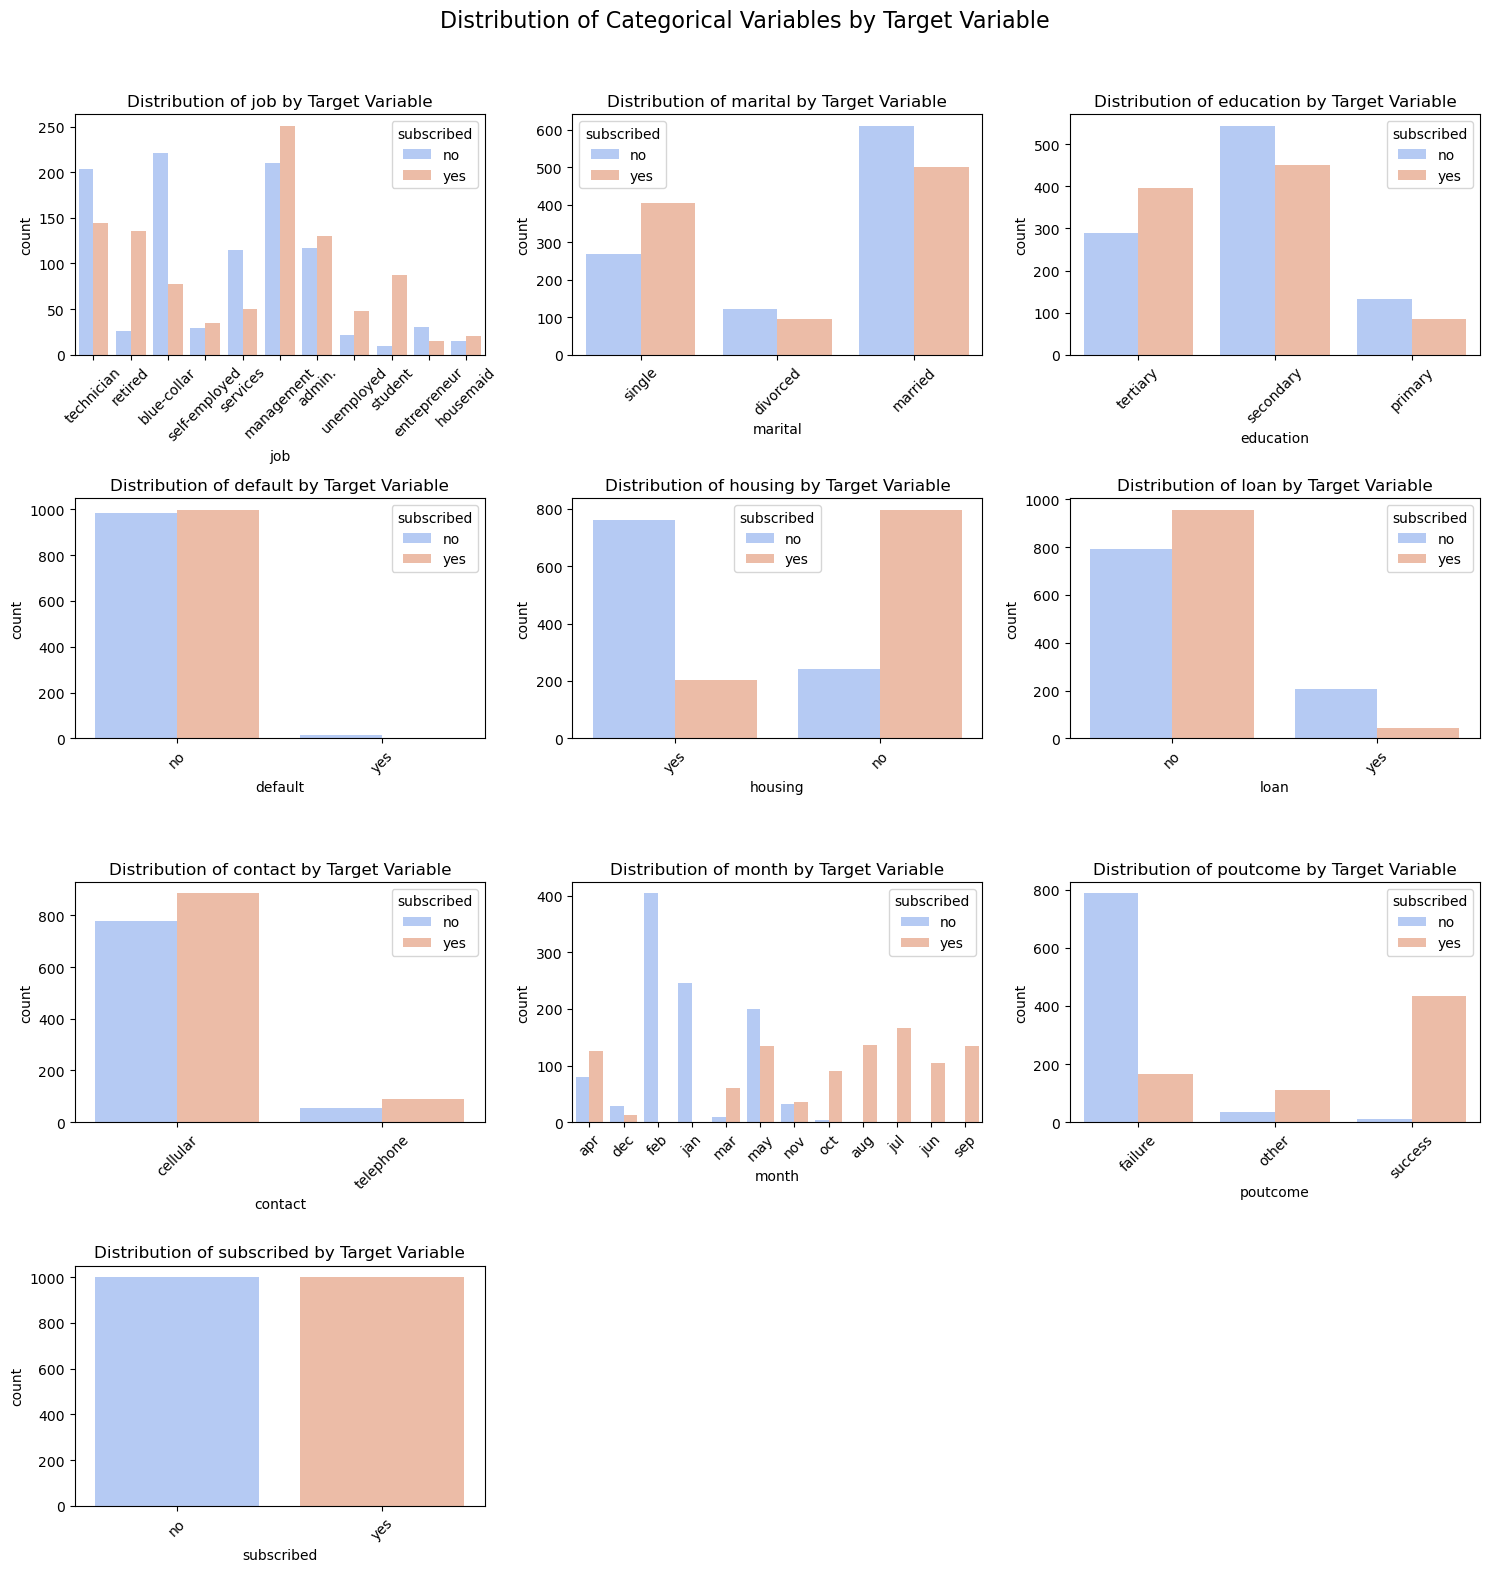

In [90]:
# Plot the relationship between categorical variables and the target variable
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 4))
fig.suptitle("Distribution of Categorical Variables by Target Variable", fontsize=16)

# Flatten the axes array and limit it to the number of categorical columns
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, hue='subscribed', palette='coolwarm', ax=axes[i])
    axes[i].set_title(f"Distribution of {column} by Target Variable")
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(len(categorical_columns), len(axes)):
    axes[j].set_visible(False)  # Hide instead of deleting

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()